# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

Задача будет выпуклой, если матрица $A$ симметричная и положительна полуопределена. Если положительную полуопределенность заменить на положительную определенность, то задача будет строго выпуклой :

$f(x_1)-f(x_0)\geq \left< gradf(x_0),x_1-x_0 \right> + \frac{\mu}{2}||\Delta x||^2$ - выпуклость для дифф. функций

$grad f(x_0)=\frac{1}{2}(A+A^T)x_0-b^T$

$\frac{1}{2}(x_1^TAx_1)-b^Tx_1-\frac{1}{2}(x_0^TAx_0)+b^Tx_0 \geq \left< \frac{1}{2}(A+A^T)x_0-b^T,x_1-x_0\right> + \frac{\mu}{2}||\Delta x||^2$

$x_1^TAx_1-x_0^TAx_0-2*b^T(x_1-x_0)\geq \left<(A+A^T)x_0,x_1-x_0\right> - 2\left<b^T,x_1-x_0\right> + \mu||\Delta x||^2$

Слагаемые с b сокращаются :

$x_1^TAx_1-x_0^TAx_0 \geq \left<Ax_0,x_1-x_0\right> + \left< A^Tx_0,x_1-x_0 \right>  + \mu||\Delta x||^2$

$x_1^TAx_1-x_0^Tax_0 \geq (x_1-x_0)^TAx_0+(x_1-x_0)^TA^Tx_0 + \mu||\Delta x||^2 $

$ x_1^TAx_1 \geq x_1^TAx_0 + x_1^TA^Tx_0 - x_0^TA^Tx_0 + \mu||\Delta x||^2$

$ x_1^TAx_1 -x_1^TAx_0 -x_1^TA^Tx_0 + x_0^TA^Tx_0 \geq \mu||\Delta x||^2 $

$ x_1^T Ax_1 -x_1^T(A+A^T)x_0 + x_0^TA^Tx_0 \geq \mu||\Delta x||^2 $

Аналогично для $A^T$ можно получить

$x_1^TA^Tx_1-x_0^T(A+A^T)x_1+x_0^TAx_0 \geq \mu||\Delta x||^2$

Складывая их, получаем что

$(x_1-x_0)^T(A+A^T)(x_1-x_0)=x_1^T(A+A^T)x_1+x_0^T(A+A^T)x_0-x_1^T(A+A^T)x_0-x_0^T(A+A^T)x_1 \geq 2\cdot\mu_0||\Delta x||^2$

Значит, матрица $A+A^T$ должна быть положительно полуопределена для выпуклости и строго положительно определена для строгой выпуклости(т.к. $\mu_0>0$ по деф). В дальнейшем для удобства будем считать матрицу $A$ симметричной положительно определенной

__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

Константа сильной выпуклости :

$2 \cdot \mu_0||\Delta x||^2 \leq (\Delta x)^T(A+A^T)(\Delta x)$

$x^T\mu_oEx\leq x^TAx$

$x^T (A-\mu_0E)x\geq 0$

Чтобы матрица осталась положительно определенной нам необходимо потребовать, чтобы $\mu$ не превышало наименьшего собственного значения матрицы $A$

Константа Липшица градиента :

$||grad f(x_1)-gradf(x_0)||\leq L\cdot ||x_1-x_0||$

$||A(x_1-x_0)||\leq ||A||\cdot||x_1-x_0||$

Отсюда видно, $$L\geq ||\lambda_{max}||$$

## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

### __(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

Будем генерировать симметричные положительно определенные матрицы

In [1]:
import numpy as np

Сначала сделаем произвольную диагональную матрицу из положительных элементов, причем все элементы распределены между $\mu$ и $L$

Затем повернем ее при помощи какой-нибудь произвольной ортогональной матрицы, достав ее из, например, scipy.stats

Итоговая матрица будет симметричной, будет хранить собственные значения исходной диагональной матрицы и будет достаточно нетривиально выглядеть

In [2]:
from scipy.stats import ortho_group

In [3]:
def get_matrix(d,mu,L):
    vec=np.random.uniform(low=mu, high=L, size=d-2)
    vec=np.append(vec,mu)
    vec=np.append(vec,L)
    O=ortho_group.rvs(dim=d)
    D=np.diag(vec)
    temp=np.matmul(np.transpose(O),D)
    result = np.matmul(temp,O)
    return result
    

In [4]:
DIMENTIONS=10
mu=1
L=100
EPSILON=0.00000001

In [5]:
A=get_matrix(DIMENTIONS,mu,L)

In [6]:
b=np.random.rand(DIMENTIONS)
b

array([0.71562579, 0.18039734, 0.56762455, 0.19447853, 0.36929766,
       0.6289084 , 0.34798496, 0.88305489, 0.02728208, 0.6256374 ])

### __(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

In [7]:
def gradient_decline(A,b,x,gamma,epsilon):
    arr=[]
    answer=np.linalg.solve(A,b)
    for i in range(10000):
        x=gradient_decline_iteration(x,gamma,A,b)
        arr.append(np.linalg.norm(x-answer))
        if(np.linalg.norm(x-answer) <epsilon):
            break
    return x,arr

In [8]:
def gradient_decline_iteration(x_k,gamma_k,A,b):
    x_new=x_k-gamma_k*gradient(A,b,x_k);
    return x_new;

In [9]:
def gradient(A,b,x):
    return np.matmul(A,x)-np.transpose(b);

In [10]:
zero=np.zeros(DIMENTIONS)

### __(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [11]:
x,arr=gradient_decline(A,b,zero,1/np.linalg.norm(A),EPSILON)

In [12]:
x

array([-0.32458015,  0.08967692,  0.13421762,  0.08062444,  0.18610125,
        0.32117885,  0.2082213 ,  0.21255424, -0.22319136,  0.10129457])

In [13]:
x_exact=np.linalg.solve(A,b)
x_exact

array([-0.32458015,  0.08967692,  0.13421762,  0.08062444,  0.18610125,
        0.32117886,  0.2082213 ,  0.21255425, -0.22319137,  0.10129457])

### __(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

In [14]:
import matplotlib.pyplot as plt

#arr = [1, 2, 3, 4, 5]
#почему-то чтобы график прогрузился нужно запустить ячейку еще раз
plt.plot(range(len(arr)), arr)
plt.xlabel("Element number")
plt.ylabel("Element value")
plt.show()

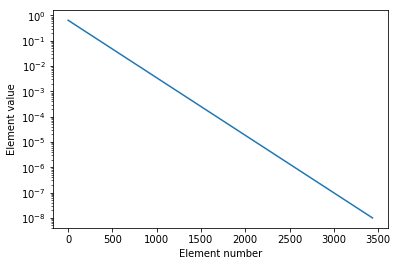

In [15]:
import matplotlib.pyplot as plt

#arr = [1, 2, 3, 4, 5]

fig, ax = plt.subplots()
ax.plot(range(len(arr)), arr)
ax.set_xlabel("Element number")
ax.set_ylabel("Element value")
ax.set_yscale('log')
plt.show()


### __(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

$||x^{k+1}-x^*||^2\leq(1-\mu/L)||x^k-x^*||^2\leq(1-\mu/L)^2 ||x^{k-1}-x^*||^2 \leq...\leq (1-\mu/L)^{k+1}||x_0-x^*||^2$

In [16]:
mult=1-mu/L
theor_arr=[]
theor_arr.append(np.linalg.norm(zero-x_exact))

for i in range(len(arr)):
    theor_arr.append(theor_arr[i]*mult)


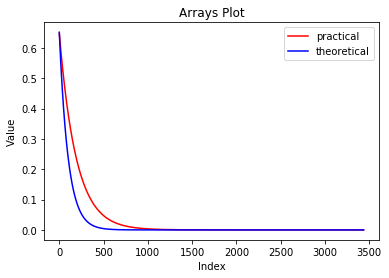

In [17]:
import matplotlib.pyplot as plt
 
#arr = [1, 2, 3, 4, 5]
#theor_arr = [2, 4, 6, 8, 10]
 
plt.plot(range(len(arr)), arr, color='red', label='practical')
plt.plot(range(len(theor_arr)), theor_arr, color='blue', label='theoretical')
 
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Arrays Plot')
plt.legend()
plt.show()


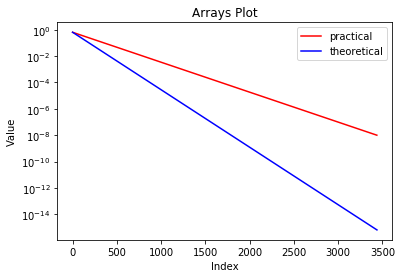

In [18]:
import matplotlib.pyplot as plt
 
#arr = [1, 2, 3, 4, 5]
#theor_arr = [2, 4, 6, 8, 10]
 
plt.plot(range(len(arr)), arr, color='red', label='practical')
plt.plot(range(len(theor_arr)), theor_arr, color='blue', label='theoretical')
 
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Arrays Plot')
plt.yscale('log')
plt.legend()
plt.show()


__Видимо наша оценка на отдельных функциях является грубой__

### __(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

In [19]:
arrays=[]
for i in range(6):
    x,arr=gradient_decline(A,b,zero,1/(pow(2,i)*np.linalg.norm(A)),EPSILON)
    arrays.append(arr)

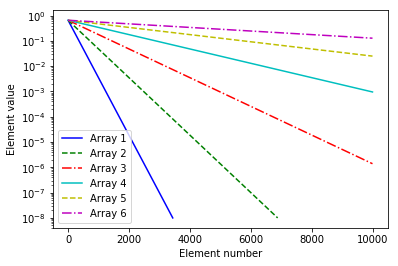

In [20]:
import matplotlib.pyplot as plt

#data = [[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]]
data=arrays
fig, ax = plt.subplots()

colors = ['b', 'g', 'r', 'c', 'y', 'm']
linestyles = ['-', '--', '-.','-', '--', '-.']

for i, arr in enumerate(data):
    ax.plot(range(len(arr)), arr, color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)], label=f"Array {i + 1}")

ax.set_xlabel("Element number")
ax.set_ylabel("Element value")
ax.legend()
ax.set_yscale('log')
plt.show()

### __(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

In [21]:
A=get_matrix(10,0.000000001,1000)

In [22]:
x,arr=gradient_decline(A,b,zero,1/np.linalg.norm(A),EPSILON)

In [23]:
x

array([-0.14295182, -0.25777803,  0.00817945, -0.01719141, -0.06420763,
       -0.13549955,  0.05499882,  0.29729622, -0.27915312,  0.06623266])

In [24]:
np.linalg.solve(A,b)

array([-26418135.02084672, -46904979.65105049,   1001565.86125792,
        -3367849.8631389 , -11708236.28840854, -25083223.32606235,
         9445737.84829143,  54295275.17529114, -51080323.40960304,
        11456894.08416346])

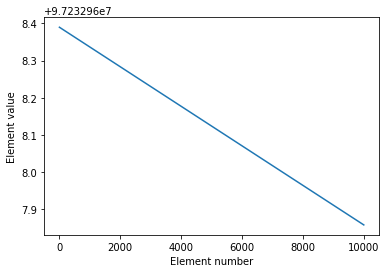

In [25]:
import matplotlib.pyplot as plt


plt.plot(range(len(arr)), arr)
plt.xlabel("Element number")
plt.ylabel("Element value")
plt.show()


Не получилось потому что при малых собственных числах скорость сходимости $rate(\alpha)=\max_i|a-\alpha \lambda_i|$ приближается к единице(еще это можно показать через число обусловленности матрицы)

### __(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

In [26]:
def func(x):
    return 0.5*np.matmul(np.matmul(x.transpose(),A),x)-np.matmul(b.transpose(),x)

In [27]:
def new_gradient_decline(A,b,x,gamma,epsilon):
    arr=[]
    answer=np.linalg.solve(A,b)
    for i in range(10000):
        x=gradient_decline_iteration(x,gamma,A,b)
        arr.append(np.linalg.norm(func(x)-func(answer)))
        if(arr[-1] < epsilon):
            break
    return x,arr

In [28]:
A=get_matrix(DIMENTIONS,mu,L)

In [29]:
x_exact=np.linalg.solve(A,b)
x_exact

array([ 0.24116221, -0.05838751,  0.4217955 ,  0.17570917,  0.27983548,
       -0.14627318,  0.08101792,  0.38135335,  0.35697835, -0.06963275])

In [30]:
x,arr=new_gradient_decline(A,b,zero,1/np.linalg.norm(A),EPSILON)

In [31]:
x

array([ 0.2411379 , -0.05835493,  0.42169544,  0.17568173,  0.27978159,
       -0.14624492,  0.08102174,  0.38131669,  0.35692855, -0.06962884])

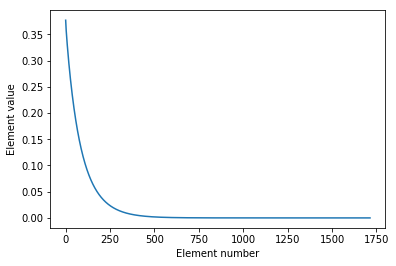

In [32]:
import matplotlib.pyplot as plt

#arr = [1, 2, 3, 4, 5]

plt.plot(range(len(arr)), arr)
plt.xlabel("Element number")
plt.ylabel("Element value")
plt.show()

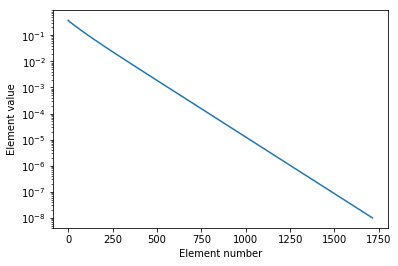

In [33]:
import matplotlib.pyplot as plt

#arr = [1, 2, 3, 4, 5]

fig, ax = plt.subplots()
ax.plot(range(len(arr)), arr)
ax.set_xlabel("Element number")
ax.set_ylabel("Element value")
ax.set_yscale('log')
plt.show()


In [34]:
arrays=[]
for i in range(6):
    x,arr=new_gradient_decline(A,b,zero,1/(pow(2,i)*np.linalg.norm(A)),EPSILON)
    arrays.append(arr)

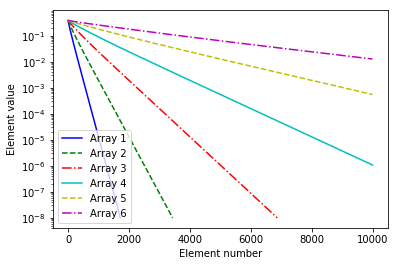

In [35]:
import matplotlib.pyplot as plt

#data = [[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]]
data=arrays
fig, ax = plt.subplots()

colors = ['b', 'g', 'r', 'c', 'y', 'm']
linestyles = ['-', '--', '-.','-', '--', '-.']

for i, arr in enumerate(data):
    ax.plot(range(len(arr)), arr, color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)], label=f"Array {i + 1}")

ax.set_xlabel("Element number")
ax.set_ylabel("Element value")
ax.legend()
ax.set_yscale('log')
plt.show()

Вывод : в целом эквивалентно, мерять по разнице между иксами или по разнице между функциями

__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

In [36]:
#ответ